# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></div><div class="lev1 toc-item"><a href="#Percent-Points" data-toc-modified-id="Percent-Points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Percent Points</a></div><div class="lev1 toc-item"><a href="#Now-for-a-lower-bound-for-|z_U\|_2^2" data-toc-modified-id="Now-for-a-lower-bound-for-|z_U\|_2^2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Now for a lower bound for $\|z_U\|_2^2$</a></div><div class="lev1 toc-item"><a href="#Comparing-one-and-two-norms" data-toc-modified-id="Comparing-one-and-two-norms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing one and two norms</a></div><div class="lev2 toc-item"><a href="#Stats-about-S_lambda(z)" data-toc-modified-id="Stats-about-S_lambda(z)-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Stats about $S_\lambda(z)$</a></div><div class="lev2 toc-item"><a href="#Stats-about-z_U" data-toc-modified-id="Stats-about-z_U-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Stats about $z_U$</a></div><div class="lev2 toc-item"><a href="#Of-note" data-toc-modified-id="Of-note-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Of note</a></div><div class="lev1 toc-item"><a href="#Lower-bounding-Lipschitz-functions?" data-toc-modified-id="Lower-bounding-Lipschitz-functions?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Lower-bounding Lipschitz functions?</a></div><div class="lev2 toc-item"><a href="#For-fixed-n." data-toc-modified-id="For-fixed-n.-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>For fixed $n$.</a></div><div class="lev1 toc-item"><a href="#When-lambda-=-1" data-toc-modified-id="When-lambda-=-1-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>When $\lambda = 1$</a></div><div class="lev1 toc-item"><a href="#When-lambda-=-\rho-\sqrt{s-\log-(n/s)}" data-toc-modified-id="When-lambda-=-\rho-\sqrt{s-\log-(n/s)}-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>When $\lambda = \rho \sqrt{s \log (n/s)}$</a></div><div class="lev1 toc-item"><a href="#Comparing-support-size-and-inner-product" data-toc-modified-id="Comparing-support-size-and-inner-product-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparing support size and inner-product</a></div>

# Import

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm

In [3]:
import pdmse

trying alternative import for spgl1...
No module named 'spgl1'


# Percent Points

In [ ]:
def ppfTangent(t, t0):
    return (t-t0)/norm.pdf(norm.ppf(t0)) + norm.ppf(t0)

In [ ]:
def ppfUnderApprox(t, n):
    return np.maximum(ppfTangent(t, 0.5), ppfTangent(t, n/(n+1)))

In [ ]:
def extremeQuantile(t):
    return norm.ppf(1 - 1/t)

In [ ]:
def normalHazard(t):
    return norm.pdf(t) / (1 - norm.cdf(t))

In [ ]:
n = 1000
t_ = np.linspace(0, 1, n)
t = np.linspace(1, n, n)
T = np.linspace(-2, 2, n+1)

mu_n = np.sqrt(2*np.log(n))

PhiInv = norm.ppf(t_)
y_under = ppfUnderApprox(t_, n)
y_over = 2*mu_n*(t_-.5)

In [ ]:
plt.plot(T, normalHazard(T))

In [ ]:
plt.plot(t, extremeQuantile(t));
plt.plot(t, np.sqrt(np.log(t)), 'r--');
plt.plot(t, .8*np.sqrt(2*np.log(t)), 'g--');

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, PhiInv)
plt.plot(t, y_under, 'r--')
plt.plot(t, y_over, 'g--')
plt.plot(t, np.zeros(t.shape), 'k:');
plt.ylim(-5, 5);

In [ ]:
lam = 1
idx = int(np.floor((n+1)*(1-norm.cdf(lam))))
zU_under = y_under[-idx:]
zU_over = y_under[-idx:]

In [ ]:
np.dot(zU_under, zU_under)

In [ ]:
lam * np.linalg.norm(zU_over, 1)

In [ ]:
def crudeApprox(n,lam):
    t_ = np.linspace(0, 1, n)
    PhiInv = norm.ppf(t_)
    mu_n = np.sqrt(2*np.log(n))
    y_under = ppfUnderApprox(t_, n)
    y_over = 2*mu_n*(t_-.5)
    idx = int(np.floor((n+1)*(1-norm.cdf(lam))))
    zU_under = y_under[-idx:]
    zU_over = y_under[-idx:]
    return np.dot(zU_under, zU_under) - lam * np.linalg.norm(zU_over,1)

# Now for a lower bound for $\|z_U\|_2^2$

In [ ]:
lam = 1
z = np.random.randn(n)
zU = pdmse.softThresh(z, lam)
J = np.argsort(z)

In [ ]:
plt.plot(z[J]);
plt.plot(zU[J]);

In [ ]:
plt.plot(t_, norm.ppf(t_));
plt.plot(t_, )

In [ ]:
plt.plot(t_, norm.cdf(-2*t_))
plt.plot(t_, norm.cdf((2*(t_-1))))

In [ ]:
plt.plot(t_, norm.ppf(t_));
plt.plot(t_, (t_-.5)*(norm.cdf(-2*t_)/norm.pdf(0) + norm.cdf(2* (t_-1))*np.sqrt(8 *np.log(n))) )

# Comparing one and two norms

In [15]:
lam_max = np.sqrt(2 * np.log(n))

In [16]:
n = 10000
lam = lam_max * (3/5)

z = np.random.randn(n)
Sz = pdmse.softThresh(z, lam)

In [17]:
print('lambda_max = {}'.format(lam_max))
print('lambda = {}'.format(lam))
print('lambda^2 = {}'.format(lam**2))

lambda_max = 3.7169221888498383
lambda = 2.230153313309903
lambda^2 = 4.9735838008671385


In [18]:
while np.dot(Sz, z) < np.sqrt(n):
    z = np.random.randn(n)
    Sz = pdmse.softThresh(z, lam)

In [19]:
print('<S(z; lam), z> = {}'.format(np.dot(Sz,z)))
print('<S(z; lam), z>/sqrt(n) = {}'.format(np.dot(Sz,z)/np.sqrt(n)))
J = np.argsort(z)
z = z[J]
Sz = Sz[J]

zU = z.copy()
zU[Sz == 0] = 0

cardU = n - np.sum(zU == 0)
print('|U| = {}'.format(cardU))

<S(z; lam), z> = 272.09780982238954
<S(z; lam), z>/sqrt(n) = 2.7209780982238954
|U| = 278


## Stats about $S_\lambda(z)$

In [20]:
print('norm(S(z;lam), 2)^2 = {}'.format(np.dot(Sz, Sz)))
print('lam*norm(S(z;lam), 1) = {}'.format(lam*np.linalg.norm(Sz, 1)))

norm(S(z;lam), 2)^2 = 60.58361269368194
lam*norm(S(z;lam), 1) = 211.51419712870756


## Stats about $z_U$

In [21]:
print('<zU, zU> = {}'.format(np.dot(zU, zU)))
print('2*lam*norm(zU, 1) = {}'.format(np.linalg.norm(zU, 1)))
print('lam^2 * |U| = {}'.format(lam**2 * cardU))

<zU, zU> = 1866.2683035921616
2*lam*norm(zU, 1) = 714.8255163694414
lam^2 * |U| = 1382.6562966410645


## Of note

1. We have observed that $\lambda \|z_U\|_1 \leq (\tilde s \sqrt{2 \log n}) (C \sqrt{s \log(n/s)})$ where $\tilde s = |U|$. Should it be that $\tilde s = \sqrt n$? $n^{1/4}$? $n^{1/8}$? 
2. $\|z_U\|_1^2 = \|z_U\|_2^2 + \sum_{j\neq k} z_{(j)}z_{(k)}$ so maybe we can quantify the sum of some of the off-diagonal elements of the matrix $[z_{(j)}z_{(k)}]_{j,k}$ using the result in that pdf book I have. 
3. Empirically, it seems to be the case that $\langle S_\lambda (z), z\rangle \approx |U| = \tilde s$. It is typically very close but can vary by about 10%, max. Is the reason for this obvious? 

# Lower-bounding Lipschitz functions?

In [4]:
def approximateThresholdScaling(lam, n, k=1000):
    """
    approximateThresholdScaling(lam, n[, k]) 
    Finds the distribution of the constant K such that
        <S(z; lambda), z> = K(z, lambda) <S(z; lambda), S(z; lambda)>
    where z ~ N(0, 1), lambda > 0 and S(.; lambda) is the 
    lambda-soft thresholding operator
        S(z; lambda) = max(0, |z| - lambda) * sgn(z). 
    We know from Convex Analysis that S(.; lambda) is firmly non-expansive
    For all z, w, a convex function f is firmly non-expansive if
        <f(z) - f(w), z - w> ≥ <f(z) - f(w), f(z) - f(w)>
    Moreover, we know that S(.; lambda) is Lipschitz continuous with 
    Lipschitz constant almost surely equal to 1
        ||S(z; lambda) - S(w; lambda)|| ≤ L ||z - w||. 
    We are hoping to even further constrain the behaviour of the 
    soft-thresholding operator to determine a minimum growth rate of its
    norm with respect to dimension. 
    """
    z = np.random.randn(n, k)
    Sz = pdmse.softThresh(z, lam)
    return np.einsum('i...,i...', Sz, z) / np.einsum('i...,i...', Sz, Sz)

In [70]:
def approximateThresholdScaling2(lam, n, k=1000):
    Sz = pdmse.softThresh(np.random.randn(n, k), lam)
    Sz1 = np.linalg.norm(Sz, axis=0)
    Sz2sq = np.einsum('i...,i...', Sz, Sz)
    return lam * Sz1 / Sz2sq

## For fixed $n$. 

In [68]:
n = 10000; k = 1000;
s = 1
lam_max = np.sqrt(np.log(n))
rho = 1 #3/5
lamVec = np.linspace(.1, rho*lam_max, 500);

thrDist = np.zeros((lamVec.size, k))
thrDist2 = np.zeros((lamVec.size, k))
for ell, lam in enumerate(lamVec):
    if (10*ell % 300) == 0:
        print('{} %'.format(np.round(100*(ell+1)/lamVec.size, 1)), end='\r')
    thrDist[ell, :] = approximateThresholdScaling(lam, n, k)
    thrDist2[ell, :] = approximateThresholdScaling2(lam, n, k)

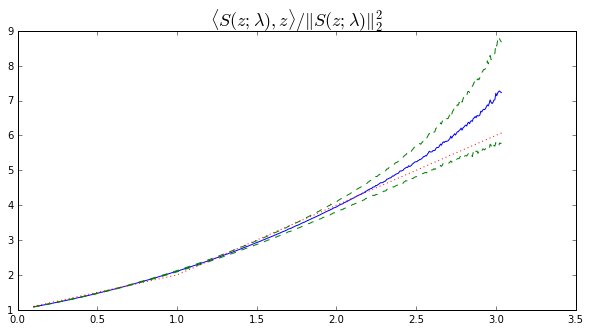

In [69]:
plt.figure(figsize=(10,5));
plt.plot(lamVec, thrDist.mean(axis=1));
plt.plot(lamVec, thrDist.mean(axis=1) - thrDist.std(axis=1), 'g--')
plt.plot(lamVec, thrDist.mean(axis=1) + thrDist.std(axis=1), 'g--')
plt.plot(lamVec, (lamVec + 1) * (lamVec < 1) + 2*lamVec*(lamVec >=1), 'r:');
plt.title('$\\langle S(z;\\lambda),z \\rangle / \\|S(z; \\lambda)\\|_2^2$', size=18);

# When $\lambda = 1$

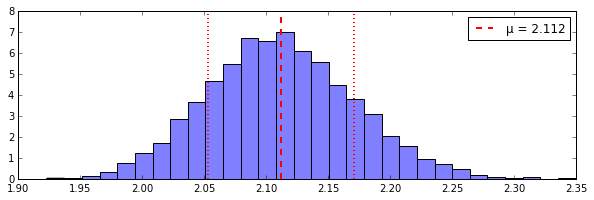

In [22]:
lower_constant_approx1 = approximateThresholdScaling(1, 1000, 10000)
plt.figure(figsize=(10,3))
pdf, bins, patches = plt.hist(lower_constant_approx1, bins=30, normed=True, color=(0,0,1,.5));
ymin, ymax = plt.ylim();
mu1 = lower_constant_approx1.mean()
std1 = lower_constant_approx1.std()
plt.vlines(mu1, 0, ymax, 'r', 'dashed', lw=2, label='µ = {:5.4g}'.format(mu1));
plt.vlines([mu1 - std1, mu1 + std1], 0, ymax, 'r', 'dotted', lw=2);
plt.legend();

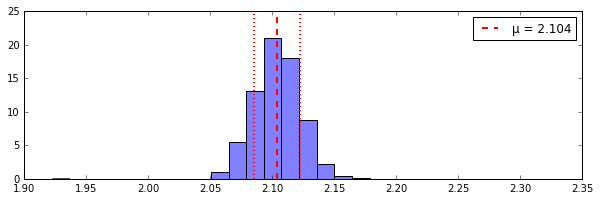

In [23]:
lower_constant_approx2 = approximateThresholdScaling(1, 10000, 1000)
plt.figure(figsize=(10,3))
pdf2, bins2, patches2 = plt.hist(lower_constant_approx2, bins=bins, normed=True, color=(0,0,1,.5));
ymin2, ymax2 = plt.ylim();
mu2 = lower_constant_approx2.mean()
std2 = lower_constant_approx2.std()
plt.vlines(mu2, 0, ymax2, 'r', 'dashed', lw=2, label='µ = {:5.4g}'.format(mu2));
plt.vlines([mu2 - std2, mu2 + std2], 0, ymax2, 'r', 'dotted', lw=2);
plt.legend();

# When $\lambda = \rho \sqrt{s \log (n/s)}$

In [24]:
rho = 3/5
s = 2
n3 = 1000
lam3 = rho * np.sqrt(s*np.log(n3/s))

lower_constant_approx3 = approximateThresholdScaling(lam3, n3, 10000)

lambda = 2.1153056116939646


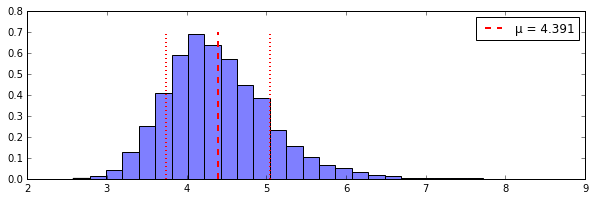

In [26]:
plt.figure(figsize=(10,3))
pdf, bins, patches = plt.hist(lower_constant_approx3, bins=30, normed=True, color=(0,0,1,.5));
ymin, ymax = plt.ylim();
mu3 = lower_constant_approx3.mean()
std3 = lower_constant_approx3.std()
plt.vlines(mu3, 0, ymax, 'r', 'dashed', lw=2, label='µ = {:5.4g}'.format(mu3));
plt.vlines([mu3 - std3, mu3 + std3], 0, ymax, 'r', 'dotted', lw=2);
plt.legend();
print('lambda = {}'.format(lam3))

$2 \lambda \approx $ {{print(np.round(2 * lam3, 2))}}

In [29]:
n4 = 10000
lam4 = rho * np.sqrt(s*np.log(n4/s))

lower_constant_approx4 = approximateThresholdScaling(lam4, n4, 10000)

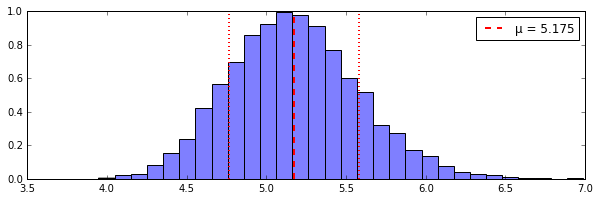

In [35]:
plt.figure(figsize=(10,3))
pdf, bins, patches = plt.hist(lower_constant_approx4, bins=30, normed=True, color=(0,0,1,.5));
ymin, ymax = plt.ylim();
mu4 = lower_constant_approx4.mean()
std4 = lower_constant_approx4.std()
plt.vlines(mu4, 0, ymax, 'r', 'dashed', lw=2, label='µ = {:5.4g}'.format(mu4));
plt.vlines([mu4 - std4, mu4 + std4], 0, ymax, 'r', 'dotted', lw=2);
plt.legend();

$2 \lambda \approx $ {{print(np.round(2 * lam4, 2))}}

In [ ]:
print(lam3)
print(lam4)

In [ ]:
lam4/lam3

In [ ]:
mu3/mu4

In [ ]:
.5/lam3

In [ ]:
.5/lam4

# Comparing support size and inner-product

In [286]:
from scipy.stats import norm
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import normal_ad, lillifors
from statsmodels.graphics.gofplots import qqplot

In [151]:
def SupportSizeInnerProductDistribution(lam, n, k=1000):
    """
    SupportSizeInnerProductDistribution(lam, n[, k]) returns the ratio
        <S(z; lambda), z> / #U, U := {j : S(z[j]; lambda) ≠ 0}
    """
    z = np.random.randn(n,k)
    Sz = pdmse.softThresh(z, lam)
    ip = np.einsum('i..., i...', Sz, z)
    ss = np.sum( np.abs(Sz) > 0, axis=0)
    return ip - ss

In [281]:
ssipRatio_Sample = SupportSizeInnerProductDistribution(2, 10000, k=1000)

Compare S_lam (z) and |U| for other values of lambda than 1 and 2 (higher values)

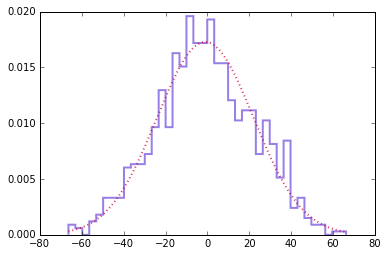

In [282]:
mu_ssip = ssipRatio_Sample.mean()
sigma_ssip = ssipRatio_Sample.std()
ssip_x = np.linspace(ssipRatio_Sample.min(), ssipRatio_Sample.max(), 1001);
ssip_pdf = norm.pdf((ssip_x - mu_ssip)/sigma_ssip);
plt.hist(ssipRatio_Sample, normed=True, bins=40, color=(.2, 0, .8, .5), lw=2, histtype='step');
plt.plot(ssip_x, ssip_pdf/sigma_ssip, ':', lw=2, color=(.8, 0, .2, .8));

In [283]:
print(normal_ad(ssipRatio_Sample))
print(lillifors(ssipRatio_Sample))
print(normaltest(ssipRatio_Sample))

(0.61463936013785769, 0.10960432737473848)
(0.021625937297216957, 0.30204689884065516)
NormaltestResult(statistic=5.9027227890022358, pvalue=0.052268499441635294)


Okay so we can't reject the null hypothesis. This makes sense: $\langle S_\lambda(z), z\rangle / |U| > 0$ so the distribution cannot be normal, even if it looks that way. What does a qq-plot say? 

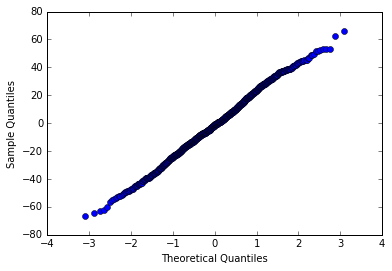

In [284]:
qqplot(ssipRatio_Sample);

So a normal distribution kind of doesn't wind up fitting the left tail. 

In [285]:
(ssipRatio_Sample.mean() - 1)/ssipRatio_Sample.std()

-0.086406333324723292